In [29]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [30]:
df = pd.read_csv('C:/Users/imadi/Downloads/spam.csv',encoding = "latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [32]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [33]:
df = df.rename(columns = {'v1':'label','v2':'text'})
df.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
df.fillna("",inplace = True)
df['text'] = df['text'] + ' ' + df['Unnamed: 2'] + ' ' + df['Unnamed: 3'] + ' ' + df['Unnamed: 4']
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [35]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
#Preprocessing: Convert labels to binary (0 for ham, 1 for spam)
df['label'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [38]:
# Split the dataset into training and testing sets
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(set(y_train))

{0, 1}


In [40]:
# Step 2: Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [41]:
# Step 3: Train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [42]:
# Step 4: Test the model
y_train_pred = logreg_model.predict(X_train_tfidf)
y_test_pred = logreg_model.predict(X_test_tfidf)

In [43]:
# Step 5: Calculate and print accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [44]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.977563383441777
Testing Accuracy: 0.9668161434977578


In [45]:
# Additional: Print classification reports
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

In [46]:
print("\nTraining Classification Report:\n", train_report)
print("\nTesting Classification Report:\n", test_report)


Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3860
           1       1.00      0.84      0.91       597

    accuracy                           0.98      4457
   macro avg       0.99      0.92      0.95      4457
weighted avg       0.98      0.98      0.98      4457


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
# Step 6: Calculate and print confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):\n", cm_test)


Confusion Matrix (Test Set):
 [[964   1]
 [ 36 114]]


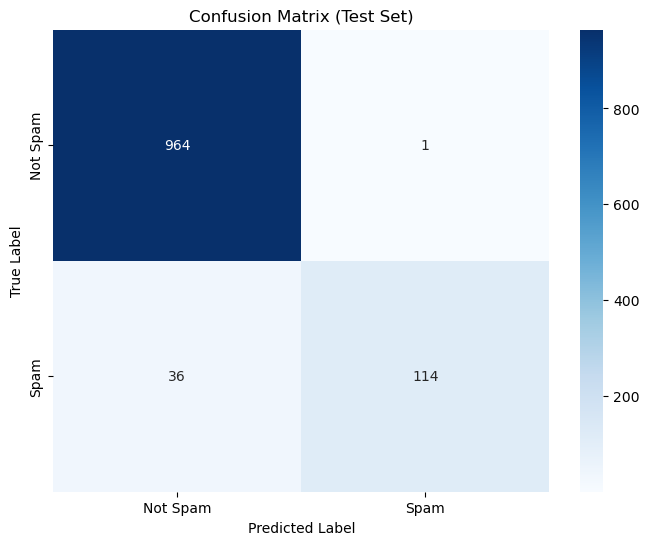

In [49]:
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

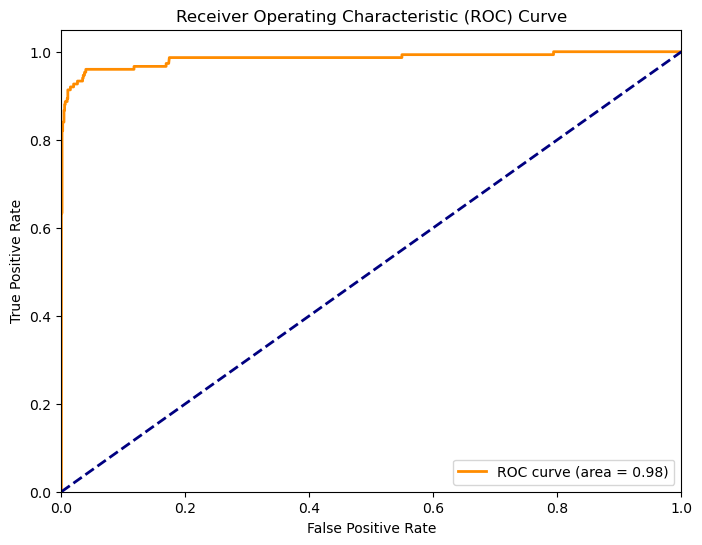

In [51]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()